<a href="https://colab.research.google.com/github/adroc/Lacrosse/blob/main/Shots_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
from io import StringIO

data = """Quarter,Player #,x,y,E,Hand/angles,Est time in game,Situation
1,4,-7,7,P,LHL,,
1,33,7,6,S,RLH,5.05,
1,23,-10,13,W,RSP,5.31,
1,4,-3,3,W,,7.32,Unsettled
1,23,-2,0,S,CHL,,
1,12,-5,5,S,RHL,9.05,
1,11,5,5,S,RHL,,
1,23,-10,15,S,RHH,11.43,
1,33,7,7,S,RLL,12.24,
1,33,3,3,P,RMH,13.48,MU
1,11,-12,10,W,RM,14.06,
1,23,-8,13,P,RH,14.5,
1,12,-5,17,S,RLL,15.2,
1,8,2,1,W,RLM,15.53,
2,4,-7,7,S,LHL,17.19,
2,11,4,6,S,RHH,17.25,
2,8,2,3,G,RLL,17.53,Unsettled
2,4,7,5,S,LHL,20.25,
2,4,-7,4,S,LLM,23.36,
2,23,-9,8,S,RHM,26.54,
2,4,-2,2,G,LHH,27.04,
2,33,7,5,S,RLL,29.01,Unsettled
2,33,9,9,W,LHM,30.45,
2,8,-1,1,S,BLL,31.55,
2,8,2,12,G,RMH,32.58,MU
2,23,1,12,S,LHL,33.43,
3,4,-4,5,W,LMM,37.1,Unsettled
3,23,-7,12,W,RH,38.22,MU
3,33,7,7,W,RLH,38.3,MU
3,8,1,2,G,RLL,38.55,MU
3,33,7,7,S,RLM,40.08,
3,33,2,5,G,RLL,41.54,
4,4,-3,4,G,L,46.49,EN
4,23,-7,7,S,RHL,53.56,
4,4,-7,7,G,LMH,54.12,
4,33,8,7,S,RMH,56.41,FD
4,12,1,2,S,RHH,57.34,MU
4,33,10,2,W,RMM,60.25,
4,33,7,7,S,RMH,60.37,"""

df = pd.read_csv(StringIO(data))

# Display DataFrame
tools.display_dataframe_to_user(name="Lacrosse Shot Data", dataframe=df)
# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-15, 15)
ax.set_ylim(0, 20)
ax.set_title("Lacrosse Shot Chart")
ax.set_xlabel("Field X Position")
ax.set_ylabel("Field Y Position")

# Draw the goal area
ax.plot([-3, 3], [0, 0], color='black', linewidth=3)  # Goal line
ax.add_patch(plt.Rectangle((-3, 0), 6, 4, fill=False, edgecolor='black', linestyle='dashed'))  # Crease

# Plot each shot with different markers
for _, row in df.iterrows():
    color = 'blue'  # Default for missed shots
    marker = 'o'
    if row['E'] == 'G':
        color = 'green'  # Goals in red
        marker = 'P'
    elif row['E'] == 'S':
        color = 'red'  # Saves in green
    elif row['E'] == 'P':
        color = 'orange'  # Pipe shots in orange
    elif row['E'] == 'W':
        color = 'gray'  # Missed wide shots in gray
    
    ax.scatter(row['x'], row['y'], c=color, marker=marker, s=100, label=row['E'])

# Show the plot
plt.show()




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px



In [2]:
TC20250227 = [
    [1, 4, -7, 7, "P", "LHL", "", ""],
    [1, 33, 7, 6, "S", "RLH", "5.05", ""],
    [1, 23, -10, 13, "W", "RSP", "5.31", ""],
    [1, 4, -3, 3, "W", "", "7.32", "Unsettled"],
    [1, 23, -2, 0, "S", "CHL", "", ""],
    [1, 12, -5, 5, "S", "RHL", "9.05", ""],
    [1, 11, 5, 5, "S", "RHL", "", ""],
    [1, 23, -10, 15, "S", "RHH", "11.43", ""],
    [1, 33, 7, 7, "S", "RLL", "12.24", ""],
    [1, 33, 3, 3, "P", "RMH", "13.48", "MU"],
    [1, 11, -12, 10, "W", "RM", "14.06", ""],
    [1, 23, -8, 13, "P", "RH", "14.5", ""],
    [1, 12, -5, 17, "S", "RLL", "15.2", ""],
    [1, 8, 2, 1, "W", "RLM", "15.53", ""],
    [2, 4, -7, 7, "S", "LHL", "17.19", ""],
    [2, 11, 4, 6, "S", "RHH", "17.25", ""],
    [2, 8, 2, 3, "G", "RLL", "17.53", "Unsettled"],
    [2, 4, 7, 5, "S", "LHL", "20.25", ""],
    [2, 4, -7, 4, "S", "LLM", "23.36", ""],
    [2, 23, -9, 8, "S", "RHM", "26.54", ""],
    [2, 4, -2, 2, "G", "LHH", "27.04", ""],
    [2, 33, 7, 5, "S", "RLL", "29.01", "Unsettled"],
    [2, 33, 9, 9, "W", "LHM", "30.45", ""],
    [2, 8, -1, 1, "S", "BLL", "31.55", ""],
    [2, 8, 2, 12, "G", "RMH", "32.58", "MU"],
    [2, 23, 1, 12, "S", "LHL", "33.43", ""],
    [3, 4, -4, 5, "W", "LMM", "37.1", "Unsettled"],
    [3, 23, -7, 12, "W", "RH", "38.22", "MU"],
    [3, 33, 7, 7, "W", "RLH", "38.3", "MU"],
    [3, 8, 1, 2, "G", "RLL", "38.55", "MU"],
    [3, 33, 7, 7, "S", "RLM", "40.08", ""],
    [3, 33, 2, 5, "G", "RLL", "41.54", ""],
    [4, 4, -3, 4, "G", "L", "46.49", "EN"],
    [4, 23, -7, 7, "S", "RHL", "53.56", ""],
    [4, 4, -7, 7, "G", "LMH", "54.12", ""],
    [4, 33, 8, 7, "S", "RMH", "56.41", "FD"],
    [4, 12, 1, 2, "S", "RHH", "57.34", "MU"],
    [4, 33, 10, 2, "W", "RMM", "60.25", ""],
    [4, 33, 7, 7, "S", "RMH", "60.37", ""],
]


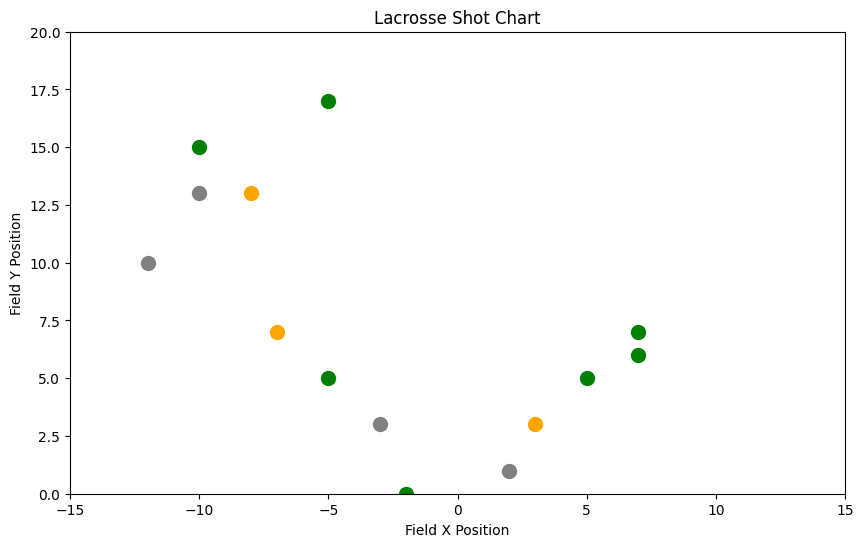

In [4]:
columns = ["Quarter", "Player #", "x", "y", "E", "Hand/angles", "~time in quarter", "Situation"]
df = pd.DataFrame(TC20250227, columns=columns)

# Function to filter data by quarter and/or player
def plot_shots(df, quarter=None, player=None):
    filtered_df = df
    if quarter:
        filtered_df = filtered_df[filtered_df["Quarter"] == quarter]
    if player:
        filtered_df = filtered_df[filtered_df["Player #"] == player]

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(-15, 15)
    ax.set_ylim(0, 20)
    ax.set_title("Lacrosse Shot Chart")
    ax.set_xlabel("Field X Position")
    ax.set_ylabel("Field Y Position")

    # Draw the goal area
    #ax.plot([-3, 3], [0, 0], color='black', linewidth=3)  # Goal line
    #ax.add_patch(plt.Rectangle((-3, 0), 6, 4, fill=False, edgecolor='black', linestyle='dashed'))  # Crease

    # Plot each shot with different markers
    for _, row in filtered_df.iterrows():
        color = 'blue'  # Default for missed shots
        marker = 'o'
        if row['E'] == 'G':
            color = 'red'  # Goals in red
            marker = 'P'
        elif row['E'] == 'S':
            color = 'green'  # Saves in green
        elif row['E'] == 'P':
            color = 'orange'  # Pipe shots in orange
        elif row['E'] == 'W':
            color = 'gray'  # Missed wide shots in gray

        ax.scatter(row['x'], row['y'], c=color, marker=marker, s=100, label=row['E'])

    plt.show()

# Example Usage
plot_shots(df, quarter=1)  # Highlight shots from Quarter 1
# plot_shots(df, player=4)    # Highlight shots from Player #4
# plot_shots(df, quarter=1, player=4)  # Filter by both Quarter and Player


In [6]:
df = pd.DataFrame(TC20250227, columns=columns)

# Function to create an interactive shot plot
def plot_shots_interactive(df, quarter=None, player=None):
    filtered_df = df
    if quarter:
        filtered_df = filtered_df[filtered_df["Quarter"] == quarter]
    if player:
        filtered_df = filtered_df[filtered_df["Player #"] == player]

    # Define colors for different shot results
    color_map = {"G": "red", "S": "green", "P": "orange", "W": "gray"}

    # Create Plotly scatter plot
    fig = px.scatter(
        filtered_df,
        x="x",
        y="y",
        color="E",
        color_discrete_map=color_map,
        hover_data=["Quarter", "Player #", "E", "Hand/angles", "~time in quarter", "Situation"],
        title="Lacrosse Shot Chart",
        labels={"x": "Field X Position", "y": "Field Y Position"},
    )

    # Add goal line and crease (static annotations)
    fig.add_shape(
        type="line",
        x0=-3, y0=0, x1=3, y1=0,
        line=dict(color="black", width=3)
    )
    fig.add_shape(
        type="rect",
        x0=-3, y0=0, x1=3, y1=4,
        line=dict(color="black", width=2, dash="dash")
    )

    fig.show()

In [8]:
# First, check if your dataframe has data
print(f"Original dataframe shape: {df.shape}")
print(df.head())

# Check the columns to ensure x, y, and E exist
print(f"Columns in dataframe: {df.columns.tolist()}")

# Check unique values in the E column
if 'E' in df.columns:
    print(f"Unique values in E column: {df['E'].unique()}")

# Verify x and y are numeric
if 'x' in df.columns and 'y' in df.columns:
    print(f"x dtype: {df['x'].dtype}, y dtype: {df['y'].dtype}")
    print(f"x range: ({df['x'].min()}, {df['x'].max()}), y range: ({df['y'].min()}, {df['y'].max()})")

# Modified function with more robust error handling
def plot_shots_interactive(df, quarter=None, player=None):
    filtered_df = df.copy()

    # Ensure x and y are numeric
    for col in ['x', 'y']:
        if col in filtered_df.columns:
            filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

    # Apply filters
    if quarter is not None:
        filtered_df = filtered_df[filtered_df["Quarter"] == quarter]
    if player is not None:
        filtered_df = filtered_df[filtered_df["Player #"] == player]

    print(f"Filtered dataframe shape: {filtered_df.shape}")

    if filtered_df.empty:
        print("Warning: No data after filtering!")
        return

    # Define colors for different shot results
    color_map = {"G": "red", "S": "green", "P": "orange", "W": "gray"}

    # Handle potential missing values in color_map
    if 'E' in filtered_df.columns:
        missing_colors = [v for v in filtered_df['E'].unique() if v not in color_map and not pd.isna(v)]
        for val in missing_colors:
            color_map[val] = "blue"  # Default color for undefined values

    # Create Plotly scatter plot
    fig = px.scatter(
        filtered_df,
        x="x",
        y="y",
        color="E",
        color_discrete_map=color_map,
        hover_data=["Quarter", "Player #", "E", "Hand/angles", "~time in quarter", "Situation"],
        title="Lacrosse Shot Chart",
        labels={"x": "Field X Position", "y": "Field Y Position"},
    )

    # Add goal line and crease (static annotations)
    #fig.add_shape(
     #   type="line",
      #  x0=-3, y0=0, x1=3, y1=0,
       # line=dict(color="black", width=3)
    #)
    #fig.add_shape(
     #   type="rect",
      #  x0=-3, y0=0, x1=3, y1=4,
       # line=dict(color="black", width=2, dash="dash")
    #)

    # Improve layout for better visualization
    fig.update_layout(
        plot_bgcolor='white',
        xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray')
    )

    return fig

# Call the function and display the plot
fig = plot_shots_interactive(df)
if fig is not None:
    fig.show()

Original dataframe shape: (39, 8)
   Quarter  Player #   x   y  E Hand/angles ~time in quarter  Situation
0        1         4  -7   7  P         LHL                            
1        1        33   7   6  S         RLH             5.05           
2        1        23 -10  13  W         RSP             5.31           
3        1         4  -3   3  W                         7.32  Unsettled
4        1        23  -2   0  S         CHL                            
Columns in dataframe: ['Quarter', 'Player #', 'x', 'y', 'E', 'Hand/angles', '~time in quarter', 'Situation']
Unique values in E column: ['P' 'S' 'W' 'G']
x dtype: int64, y dtype: int64
x range: (-12, 10), y range: (0, 17)
Filtered dataframe shape: (39, 8)


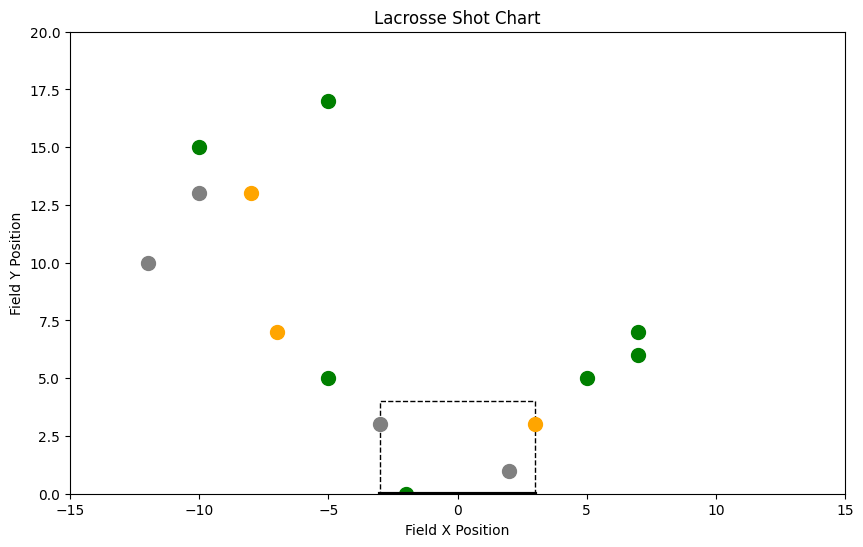

In [33]:
plot_shots(df, quarter=1)

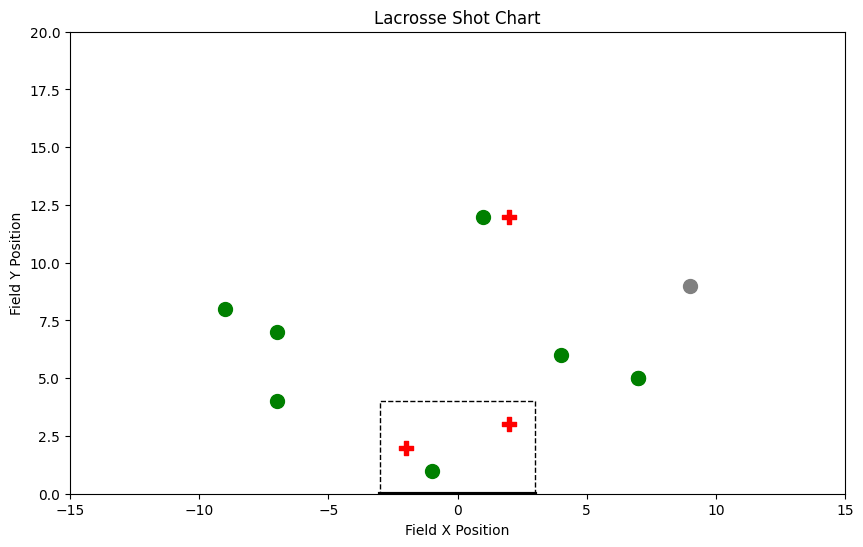

In [34]:
plot_shots(df, quarter=2)

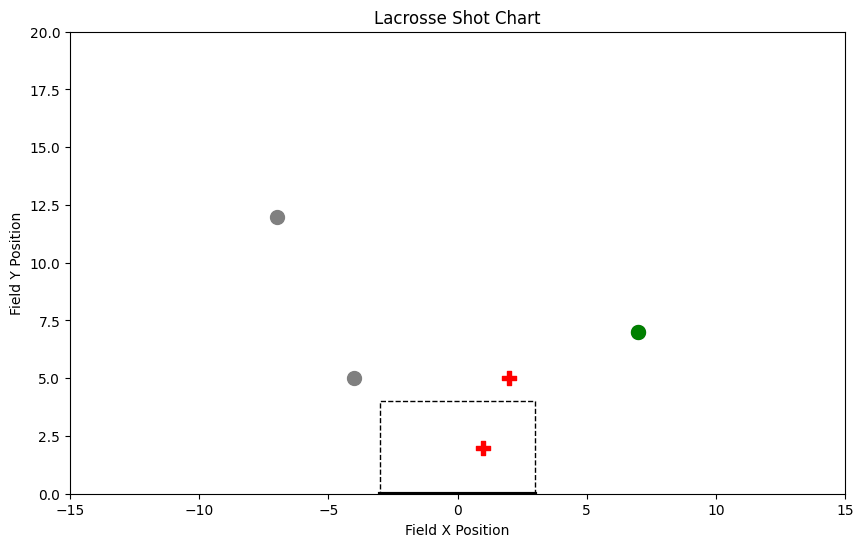

In [35]:
plot_shots(df, quarter=3)

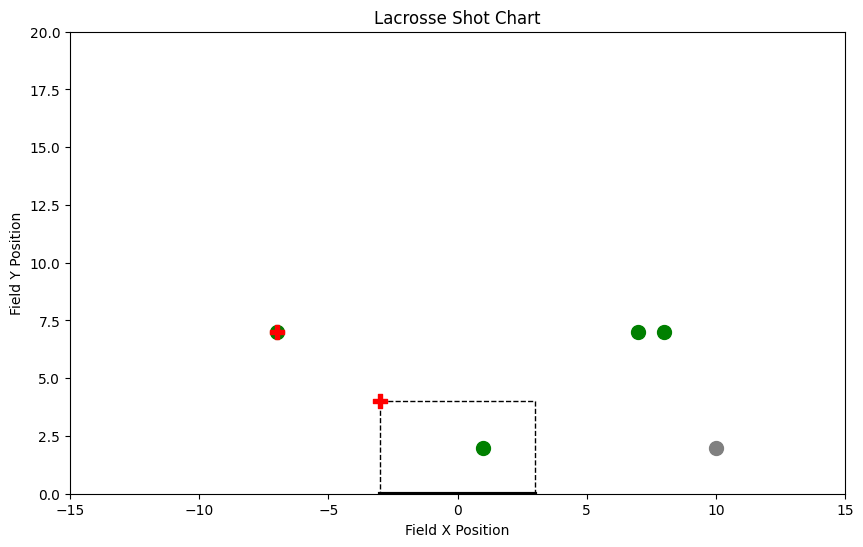

In [36]:
plot_shots(df, quarter=4)

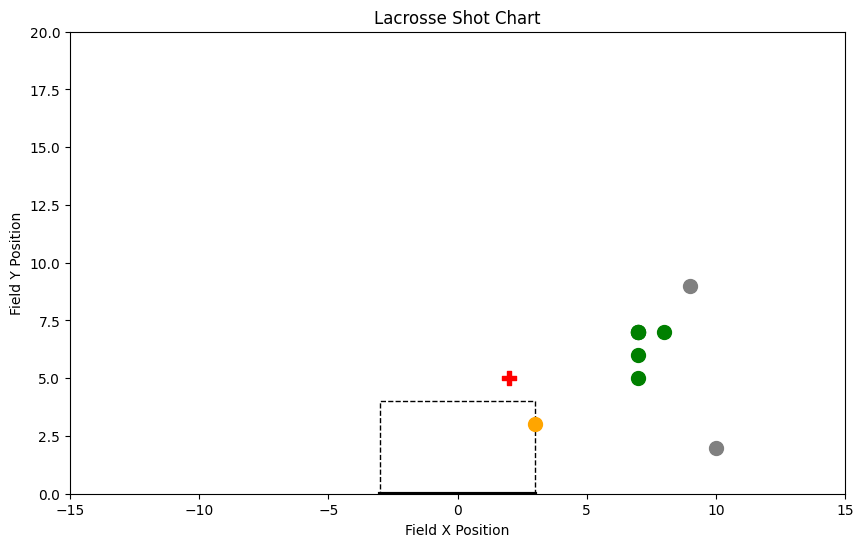

In [21]:
plot_shots(df, player=33)    # Highlight shots from Player Noah Oracion

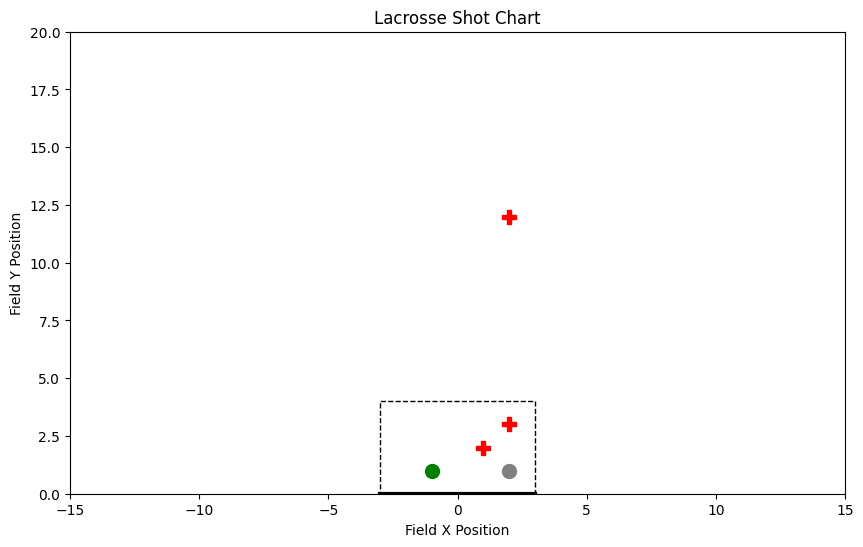

In [23]:
plot_shots(df, player=8)

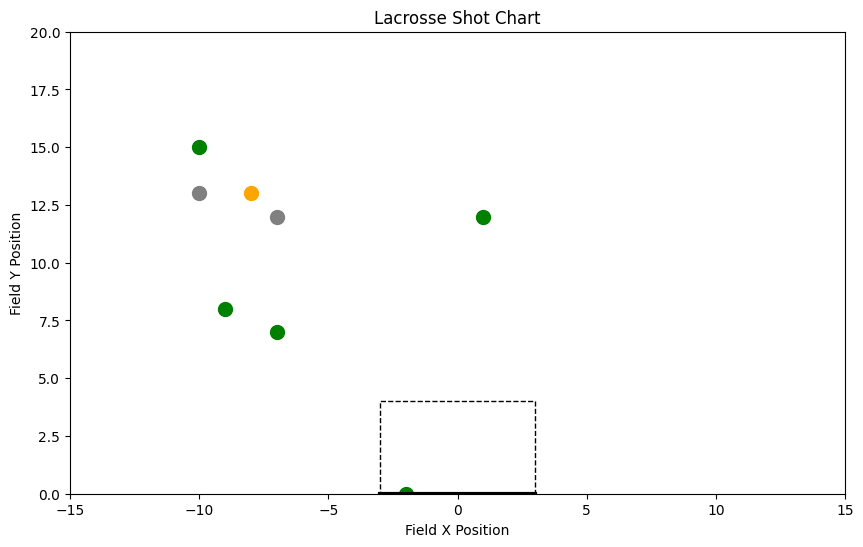

In [24]:
plot_shots(df, player=23)